In [1]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to fit Gaussian Mixture Model and evaluate clustering
def evaluate_clustering(data, n_clusters, threshold=0.5):
    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(scaled_data)
    cluster_centers = gmm.means_

    # Evaluate clustering using silhouette score and Davies-Bouldin score
    silhouette_avg = silhouette_score(scaled_data, labels)
    db_score = davies_bouldin_score(scaled_data, labels)

    print(f"Number of Clusters: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.2f}")
    print(f"Davies-Bouldin Score: {db_score:.2f}")

    # Visualize the clusters
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=30)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='X', s=200)
    plt.title(f'Gaussian Clusters (n_clusters={n_clusters})')
    plt.show()

    # Decision on reclustering
    if silhouette_avg < threshold or db_score > 1.5:
        print("Clustering quality is unsatisfactory. Consider reclustering.")
        return False, labels
    else:
        print("Clustering quality is satisfactory.")
        return True, labels

# Main function for clustering and reclustering
def analyze_and_recluster(data, initial_clusters=3, max_attempts=5, threshold=0.5):
    n_clusters = initial_clusters
    attempt = 0

    while attempt < max_attempts:
        print(f"\nAttempt {attempt + 1} with {n_clusters} clusters:")
        satisfactory, labels = evaluate_clustering(data, n_clusters, threshold=threshold)

        if satisfactory:
            print("Final clustering results are satisfactory.")
            break
        else:
            # Increase or decrease the number of clusters for reclustering
            if n_clusters > len(set(labels)):
                n_clusters -= 1
            else:
                n_clusters += 1
        attempt += 1

    if attempt == max_attempts:
        print("Max attempts reached. Final clustering may still be unsatisfactory.")
    return labels


Attempt 1 with 3 clusters:
Number of Clusters: 3
Silhouette Score: 0.75
Davies-Bouldin Score: 0.37


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


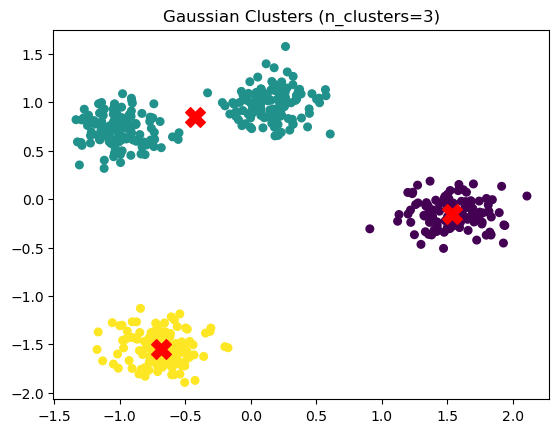

Clustering quality is satisfactory.
Final clustering results are satisfactory.


In [2]:
if __name__ == "__main__":
    # Generate synthetic data
    from sklearn.datasets import make_blobs
    data, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

    # Analyze and decide on reclustering
    labels = analyze_and_recluster(data, initial_clusters=3, threshold=0.5)